In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm, animation
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from netCDF4 import Dataset

import scipy.stats as stats
import random

In [21]:
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year1=np.arange(2001,2010)
years=np.append(year1,np.arange(2011,2021))

file=path+'Xingu_2005_bigclearing/3Dfields_d01_2005-11-10_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
    luindex=ds['LU_INDEX'][0,:,:]

In [22]:
#### Q2 and T2
time_sel = []
for ii in range(10+3,17+3): #10am to 5pm
    for iday in range(1):
        time_sel.append(ii+24*iday)

Q2_mn = np.empty(19)
T2_mn = np.empty(19)
LH_mn = np.empty(19)

for ii, year in enumerate(years):
    file = path+'post_processing/Q2T2.'+str(year)+'.obs.nc'
    with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
        pass
    
    file = path+'post_processing/energy.'+str(year)+'.obs.ndays.nc'
    with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
        pass
    ### Mask using LUindex
    q2=ds['Q2'][time_sel,:,:].where((luindex==12))*1000 # clearing
    t2=ds['T2'][time_sel,:,:].where((luindex==12)) # clearing
    lh=ds1['LH'][time_sel,:,:].where((luindex==12)) # clearing

    Q2_mn[ii] = q2.mean(('Time','south_north', 'west_east'))
    T2_mn[ii] = t2.mean(('Time','south_north', 'west_east'))
    LH_mn[ii] = lh.mean(('Time','south_north', 'west_east'))

In [37]:
neg_years+pos_years

[2005,
 2008,
 2007,
 2019,
 2004,
 2015,
 2012,
 2020,
 2017,
 2016,
 2003,
 2014,
 2018,
 2001,
 2009,
 2013,
 2002,
 2006,
 2011]

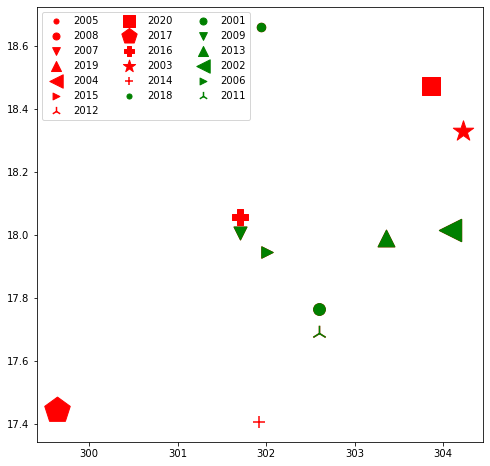

In [39]:
fig,axes = plt.subplots(1,1,figsize=(8,8),sharex=True,sharey=True)
plt.set_cmap('tab20')
markers = ['.','o','v','^','<','>','2','s','p','P','*','+','x','X','d','D','h','H','1']

LH_mn_std = (LH_mn-LH_mn.mean())/(LH_mn.std())
neg_years = [2005,2008,2007,2019,2004,2015,2012,2020,2017,2016,2003,2014]
pos_years = [2018,2001,2009,2013,2002,2006,2011]

for ii, years in enumerate(neg_years): ## strongly negative values
    axes.scatter(T2_mn[ii],Q2_mn[ii],s=abs(LH_mn_std[ii])*361,marker=markers[ii],color='r')

for ii, years in enumerate(pos_years): # less negative or positive
    axes.scatter(T2_mn[ii],Q2_mn[ii],s=abs(LH_mn_std[ii])*361,marker=markers[ii],color='g')

#axes.legend(pos_years,loc='center left',ncol=2,markerscale=0.6)
axes.legend(neg_years+pos_years,loc='upper left',ncol=3,markerscale=0.6)

#plt.legend(years,loc='upper left',ncol=3,markerscale=0.6)
#plt.xlabel('Daytime Temperature at 2m')
#plt.ylabel('Specific humidity at 2m')